In [52]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [202]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect
from flask import Flask, jsonify

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
columns = inspector.get_columns('measurement')
for c in columns:
        print(c['name'])

id
station
date
prcp
tobs


In [11]:
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

# Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
measurement_db = pd.read_sql((session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > '2016-08-23')).statement, engine)
measurement_db

,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
2218,2017-08-19,0.09
2219,2017-08-20,NaN
2220,2017-08-21,0.56
2221,2017-08-22,0.50


In [13]:
# Calculate the date 1 year ago from the last data point in the database
lastDate = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
strDate = ""
for element in lastDate:
    strDate += element
latestDate = dt.datetime.strptime(strDate, "%Y-%m-%d")
lDate = latestDate.date()
oneYearAgo = lDate - dt.timedelta(days = 365)
oneYearAgo = dt.datetime.strftime(oneYearAgo, "%Y-%m-%d")
oneYearAgo

'2016-08-23'

In [20]:
# Perform a query to retrieve the data and precipitation scores
precp = session.query(Measurement.date, Measurement.prcp).\
filter(Measurement.date > '2016-08-23').\
all()
precp

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [46]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precp_df = pd.DataFrame(precp, columns = ['date', 'precipitation'])
precp_df.set_index('date', inplace=True)
precp_df

,precipitation
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [47]:
# Sort the dataframe by date
precp_df = precp_df.sort_values(by = 'date')
precp_df

,precipitation
date,
2016-08-24,0.08
2016-08-24,NaN
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,2.15
...,...
2017-08-22,0.00
2017-08-23,0.08
2017-08-23,0.00


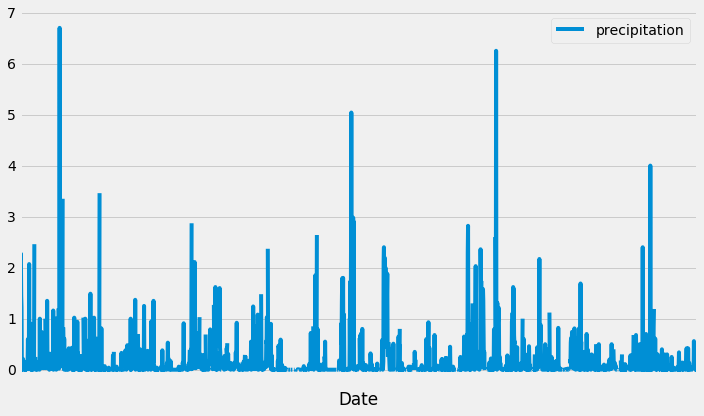

In [236]:
# Use Pandas Plotting with Matplotlib to plot the data
fig, ax = plt.subplots(figsize = (10,6))
precp_plot = precp_df.plot(ax = ax)
precp_plot.axes.get_xaxis().set_ticks([])
precp_plot.set_xlabel('Date')
precp_plot.grid(True)
plt.tight_layout()
plt.tight_layout()
plt.show()

In [85]:
# Use Pandas to calcualte the summary statistics for the precipitation data
count  = precp_df['precipitation'].count()
mean = precp_df['precipitation'].mean()
std = precp_df['precipitation'].std()
min = precp_df['precipitation'].min()
quantile25 = precp_df['precipitation'].quantile(.25)
quantile50 = precp_df['precipitation'].quantile(.50)
quantile75 = precp_df['precipitation'].quantile(.75)
max = precp_df['precipitation'].max()

summary = pd.DataFrame({'Count': [count],
                       'Mean': [mean],
                       'Std': [std],
                       'Min': [min],
                       '25%': [quantile25],
                       '50%': [quantile50],
                       '75%': [quantile75],
                       'Max':[ max]},
                      index = ['Precipitation'])
summary = summary.transpose()
summary

,Precipitation
Count,2015.000000
Mean,0.176462
Std,0.460288
Min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
Max,6.700000


# Station Analysis

In [91]:
columns = inspector.get_columns('station')
for c in columns:
        print(c['name'])

id
station
name
latitude
longitude
elevation


In [130]:
# Design a query to show how many stations are available in this dataset?
totalStations = session.query(Measurement).group_by(Measurement.station).\
count()
totalStations

9

In [132]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
stationCount = session.query(Measurement.station, func.count(Measurement.station)).\
              group_by(Measurement.station).\
              order_by(func.count(Measurement.station).desc()).all()
for record in stationCount:
    print(record)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [146]:
#Which station has the highest number of observations?
nameAt = stationCount[0][0]
stationName = session.query(Station.name).\
                filter(Station.station == nameAt).all()
print(stationName[0][0])

WAIHEE 837.5, HI US


In [155]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
minTemp = session.query(func.min( Measurement.tobs)).\
              filter(Measurement.station == nameAt).\
              order_by(func.min(Measurement.tobs).asc()).all()
maxTemp = session.query(func.max( Measurement.tobs)).\
              filter(Measurement.station == nameAt).\
              order_by(func.max(Measurement.tobs).desc()).all()
avgTemp = session.query(func.avg( Measurement.tobs)).\
              filter(Measurement.station == nameAt).\
              order_by(func.avg(Measurement.tobs).asc()).all()

In [170]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurement.tobs).\
                    filter(Measurement.station == nameAt).\
                    filter(Measurement.date > '2016-08-23').all()

temp

[(77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 (66.0),
 

In [171]:
temp_df = pd.DataFrame(temp, columns = ['tobs'])
temp_df

,tobs
0,77.0
1,80.0
2,80.0
3,75.0
4,73.0
...,...
346,77.0
347,77.0
348,76.0
349,76.0


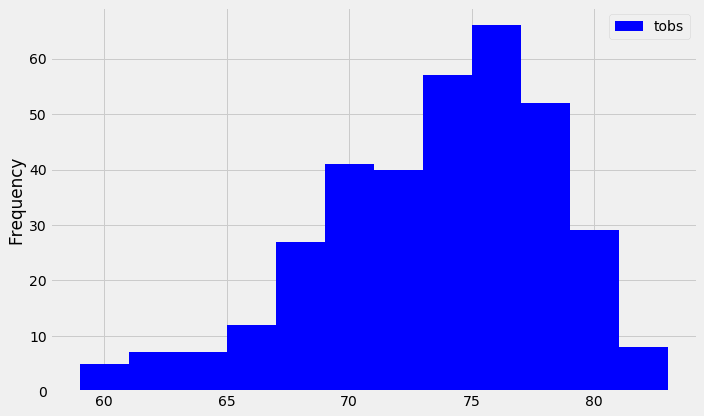

In [235]:
fig, ax2 = plt.subplots(figsize = (10,6))
tempPlot = temp_df.hist(bins = 12, ax=ax2, color='blue', label='tobs')
plt.title('')
plt.ylabel('Frequency')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [203]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [243]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
start = '2016-12-21'
end = '2017-01-21'
tempStats = calc_temps(start, end)
type(tempStats)

list

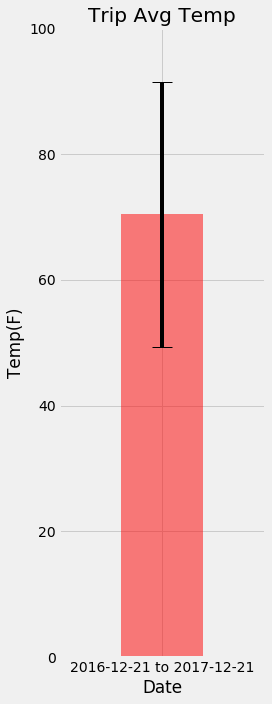

In [239]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
fig, ax3 = plt.subplots(figsize = (4,10))
ax3.bar('2016-12-21 to 2017-12-21', tempStats[0][1], yerr = (tempStats[0][2] - tempStats[0][0]), color='r', align = 'center', capsize=10, alpha=0.5)
plt.xlim(-1, 1)
plt.ylim(0,100)
plt.xticks(np.arange(len(tempStats)))
plt.ylabel('Temp(F)')
plt.xlabel('Date')
plt.title('Trip Avg Temp')
plt.tight_layout()
plt.show()

In [256]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

totalRainfall = session.query(Measurement.station, Station.name, Station.longitude, Station.longitude, Station.elevation,  func.sum(Measurement.prcp)).\
                filter(Measurement.station == Station.station).\
                filter(Measurement.date >= start).\
                filter(Measurement.date <= end).\
                group_by(Measurement.station).\
                order_by(func.sum(Measurement.prcp).desc()).all()
totalRainfall

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  -157.8025,
  -157.8025,
  152.4,
  10.93),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  -157.84888999999998,
  -157.84888999999998,
  32.9,
  3.1099999999999994),
 ('USC00513117', 'KANEOHE 838.1, HI US', -157.8015, -157.8015, 14.6, 2.25),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  -157.8374,
  -157.8374,
  7.0,
  2.19),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  -157.71139,
  -157.71139,
  19.5,
  1.24),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  -157.8168,
  -157.8168,
  3.0,
  0.24000000000000002),
 ('USC00517948', 'PEARL CITY, HI US', -157.9751, -157.9751, 11.9, 0.06)]